##### Les Membres Du Groupe (GL4): 
Mehdi Ben Salha <br>
Zakaria Soussi <br>
Med Amine Bouchnak


In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_circles

In [2]:


x,y = make_circles(n_samples=1000,noise=0.03)
y = y.reshape(y.shape[0],1)

In [3]:
import matplotlib.pyplot as plt

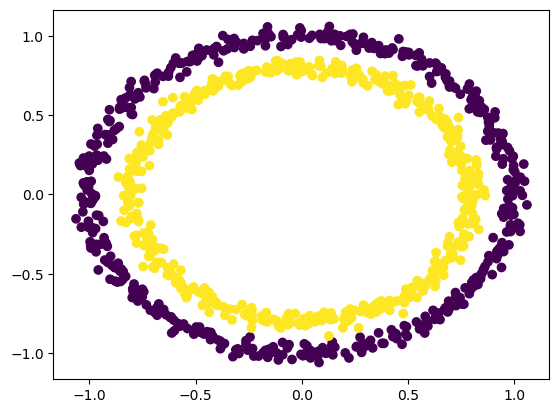

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)

In [5]:
print("Sampels number : " , x.shape[0])
print("La dimension d'entré : " , x.shape[1])
print("La dimension de sortie : " ,y.shape[1])

Sampels number :  1000
La dimension d'entré :  2
La dimension de sortie :  1


### Ce dataset nécessite une fct de sépèration non linéaire

In [37]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("X_train shape :" , X_train.shape)
print("y_train shape :" , y_train.shape)
print("X_test shape :" , X_test.shape)
print("y_test shape :" , y_test.shape)

X_train shape : (800, 2)
y_train shape : (800, 1)
X_test shape : (200, 2)
y_test shape : (200, 1)


# 2. Définition du modèle

In [45]:
X_test.shape,X_train.shape

((200, 2), (800, 2))

In [41]:
def create_model(input_shape,nbr_neurone):
    our_model = Sequential()
    our_model.add(Dense(nbr_neurone,activation='relu',input_shape=input_shape))
    our_model.add(Dense(1,activation='sigmoid'))
    return our_model

In [56]:
model = create_model((X_train.shape[1],),5)
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 5)                 15        
                                                                 
 dense_21 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
optimiser = keras.optimizers.SGD()

model.compile(optimizer= optimiser,loss='binary_crossentropy',metrics=['accuracy'])

In [58]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32)

Epoch 1/200
25/25 [==============================] - 1s 10ms/step - loss: 0.6941 - accuracy: 0.4975 - val_loss: 0.6923 - val_accuracy: 0.5250
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5063 - val_loss: 0.6901 - val_accuracy: 0.5300
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5100 - val_loss: 0.6884 - val_accuracy: 0.5300
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5013 - val_loss: 0.6870 - val_accuracy: 0.5150
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5013 - val_loss: 0.6860 - val_accuracy: 0.5100
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5125 - val_loss: 0.6852 - val_accuracy: 0.5250
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5300 - val_loss: 0.6846 - val_accuracy: 0.5450
Epoch 8/200


In [59]:
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss = history.history['loss']
loss_val = history.history['val_loss']

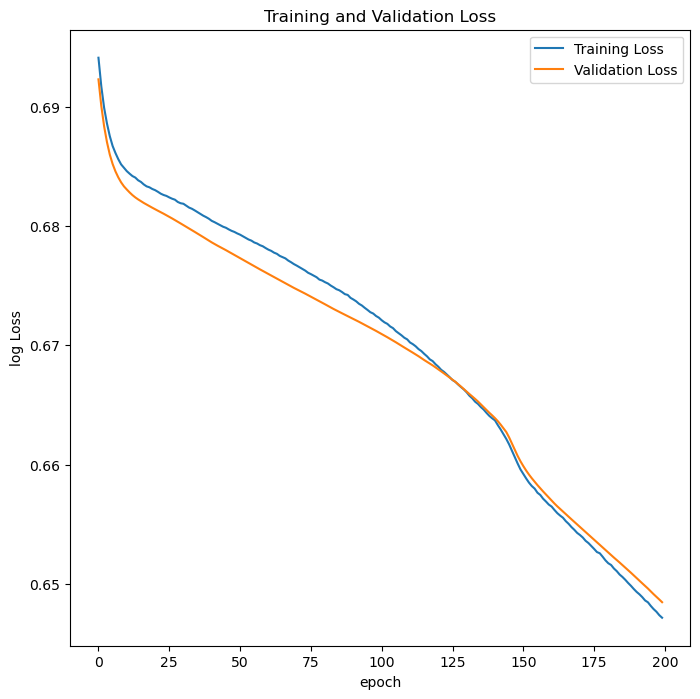

In [60]:
plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Loss')
plt.plot(loss_val, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('log Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

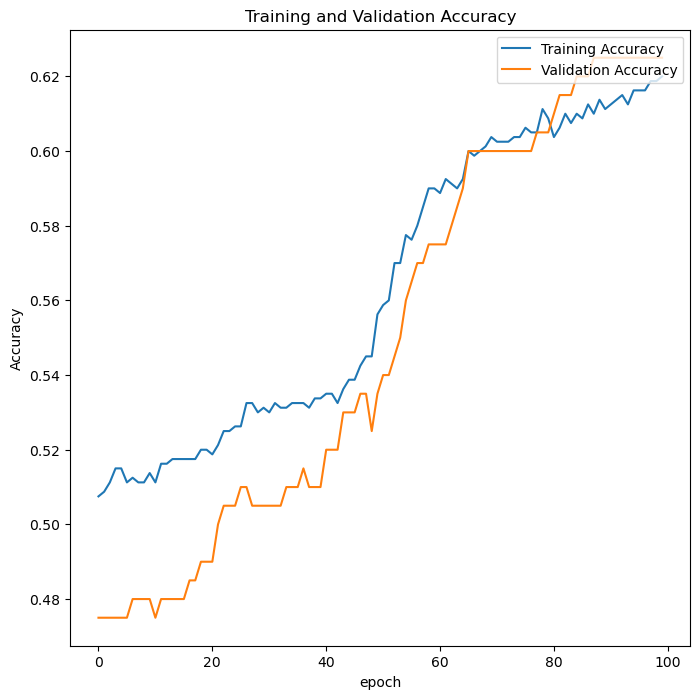

In [40]:
plt.figure(figsize=(8, 8))
plt.plot(acc, label='Training Accuracy')
plt.plot(acc_val, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

In [61]:
predictions = model.predict(x)
predictions = predictions > 0.5

32/32 [==============================] - 0s 1ms/step


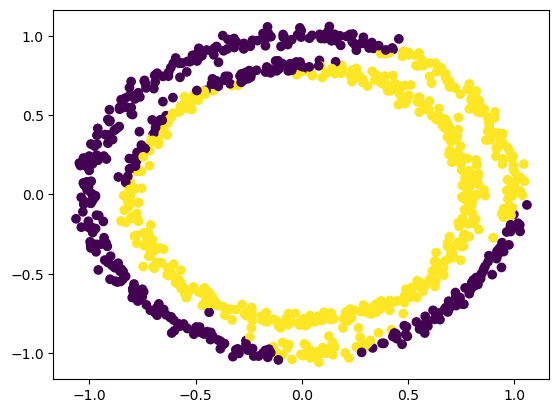

In [62]:
plt.scatter(x[:,0],x[:,1],c=predictions)

79/79 [==============================] - 0s 2ms/step


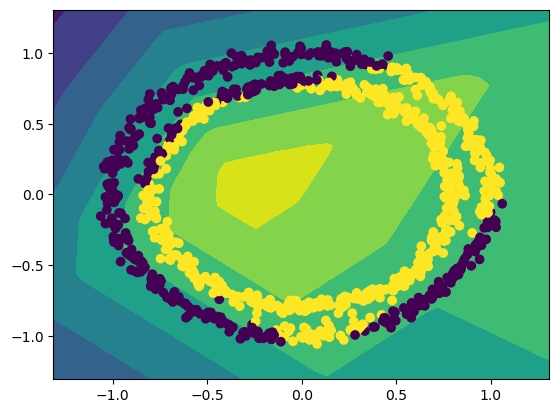

In [64]:
#plot decision boundary
import numpy as np
x_span = np.linspace(min(x[:,0])-0.25,max(x[:,0])+0.25,50)
y_span = np.linspace(min(x[:,1])-0.25,max(x[:,1])+0.25,50)
xx,yy = np.meshgrid(x_span,y_span)
grid = np.c_[xx.ravel(),yy.ravel()]
pred_func = model.predict(grid)
z = pred_func.reshape(xx.shape)
plt.contourf(xx,yy,z)
plt.scatter(x[:,0],x[:,1],c=predictions)
plt.show()

2. Quel est le probléme de ce modéle ?

Il ne peut classifier que linéairement

3. Comment am´eliorer les performances du mod`ele ?

on peut:
*augumenter le nombre des couches

*augumenter le nombre des epochs (dans ce cas n'a aucun sens car il va séparer encore linéarement)

*Changer le learning rate de l'optimizer

*Changer l'optimizer ou le loss function

*augumenter le nombre des hidden units

*Ajouter des layers non linéaires : activation layer -> c'est clair que le modéle nécessite cette solution donc on va l'implementer par l'ajout de la fonction simple Relu  ajouter une autre couche et augumenter le nombre des epochs

In [65]:
new_model = create_model((X_train.shape[1],),100)
new_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 100)               300       
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
optimiser = keras.optimizers.SGD()
new_model.compile(optimizer= optimiser,loss='binary_crossentropy',metrics=['accuracy'])
history = new_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,batch_size=32)

Epoch 1/1000
25/25 [==============================] - 1s 9ms/step - loss: 0.7001 - accuracy: 0.5025 - val_loss: 0.6983 - val_accuracy: 0.5150
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.4950 - val_loss: 0.6976 - val_accuracy: 0.4850
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.4812 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4925 - val_loss: 0.6964 - val_accuracy: 0.5100
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.4900 - val_loss: 0.6959 - val_accuracy: 0.4950
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4938 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4888 - val_loss: 0.6951 - val_accuracy: 0.5050
Epoch 

In [67]:
def plot_loss_acc(history):
    acc = history.history['accuracy']
    acc_val = history.history['val_accuracy']
    loss = history.history['loss']
    loss_val = history.history['val_loss']
    plt.figure(figsize=(12, 8))
    plt.subplot(1,2,1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(acc_val, label='Validation Accuracy')
    plt.legend(loc='upper right')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('epoch')
    plt.subplot(1,2,2)
    plt.plot(loss, label='Training Loss')
    plt.plot(loss_val, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

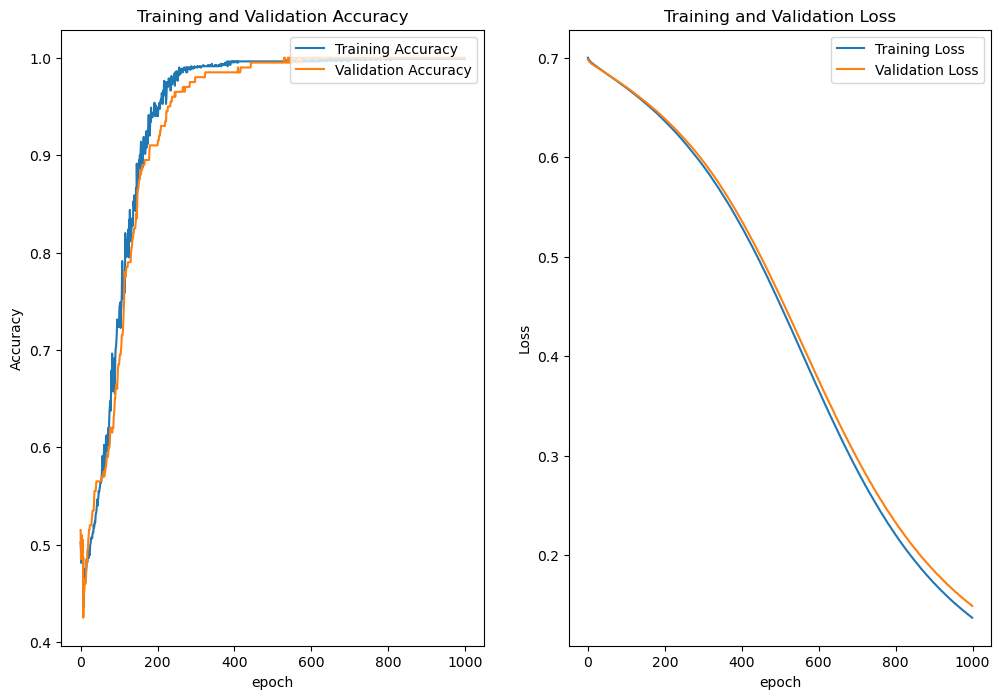

In [68]:
plot_loss_acc(history)

32/32 [==============================] - 0s 1ms/step


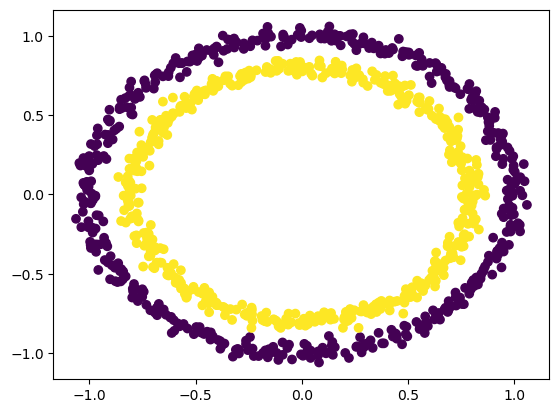

In [69]:
predictions = new_model.predict(x)
predictions = predictions > 0.5
plt.scatter(x[:,0],x[:,1],c=predictions)

79/79 [==============================] - 0s 1ms/step


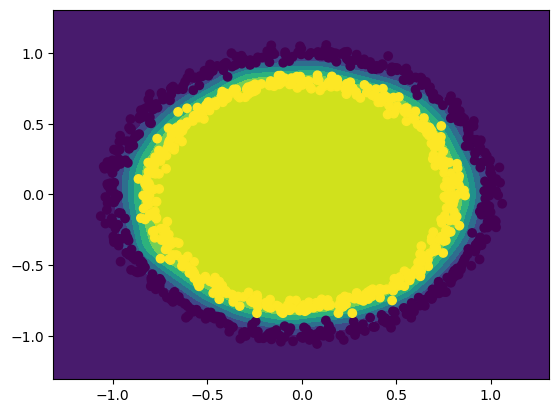

In [71]:
#plot decision boundary
import numpy as np
x_span = np.linspace(min(x[:,0])-0.25,max(x[:,0])+0.25,50)
y_span = np.linspace(min(x[:,1])-0.25,max(x[:,1])+0.25,50)
xx,yy = np.meshgrid(x_span,y_span)
grid = np.c_[xx.ravel(),yy.ravel()]
pred_func = new_model.predict(grid)
z = pred_func.reshape(xx.shape)
plt.contourf(xx,yy,z)
plt.scatter(x[:,0],x[:,1],c=predictions)
plt.show()

## La multi-Classification

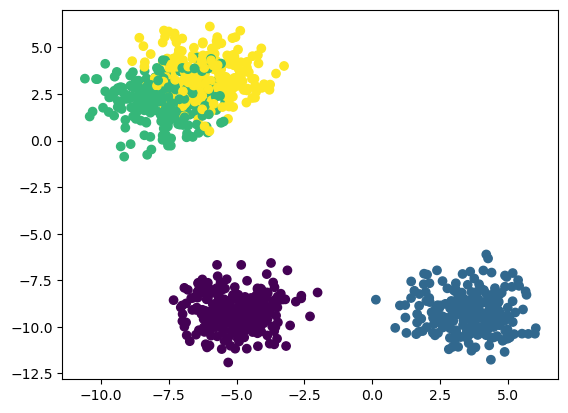

In [79]:
from sklearn.datasets import make_blobs

x , y = make_blobs(n_samples=1000,n_features=2,centers=4,cluster_std=1,random_state=41)
plt.scatter(x[:,0],x[:,1],c=y)

### Ce dataset nécessite une fonction non linéaire pour séparer ses classes 


In [80]:
import numpy as np

In [81]:
y = np.eye(4)[y]

In [82]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("X_train shape :" , X_train.shape)
print("y_train shape :" , y_train.shape)
print("X_test shape :" , X_test.shape)
print("y_test shape :" , y_test.shape)

X_train shape : (800, 2)
y_train shape : (800, 4)
X_test shape : (200, 2)
y_test shape : (200, 4)


In [83]:
def multiclass_model(input_shape,nbr_neurone):
    our_model = Sequential()
    our_model.add(Dense(nbr_neurone,activation='relu',input_shape=input_shape))
    our_model.add(Dense(nbr_neurone//2,activation='relu'))
    our_model.add(Dense(4,activation='softmax'))
    return our_model

In [84]:
multi_model = multiclass_model((x.shape[1],),100)
multi_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               300       
                                                                 
 dense_25 (Dense)            (None, 50)                5050      
                                                                 
 dense_26 (Dense)            (None, 4)                 204       
                                                                 
Total params: 5554 (21.70 KB)
Trainable params: 5554 (21.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
optimiser = keras.optimizers.SGD()

multi_model.compile(optimizer= optimiser,loss='categorical_crossentropy',metrics=['accuracy'])

In [86]:
history = multi_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32)


Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 0.7490 - accuracy: 0.7300 - val_loss: 0.4348 - val_accuracy: 0.8950
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8963 - val_loss: 0.3316 - val_accuracy: 0.8950
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3155 - accuracy: 0.9000 - val_loss: 0.2892 - val_accuracy: 0.9000
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.8963 - val_loss: 0.2778 - val_accuracy: 0.9100
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2700 - accuracy: 0.9075 - val_loss: 0.2534 - val_accuracy: 0.9000
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2564 - accuracy: 0.9038 - val_loss: 0.2443 - val_accuracy: 0.9100
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2476 - accuracy: 0.9075 - val_loss: 0.2420 - val_accuracy: 0.9050
Epoch 8/100
2

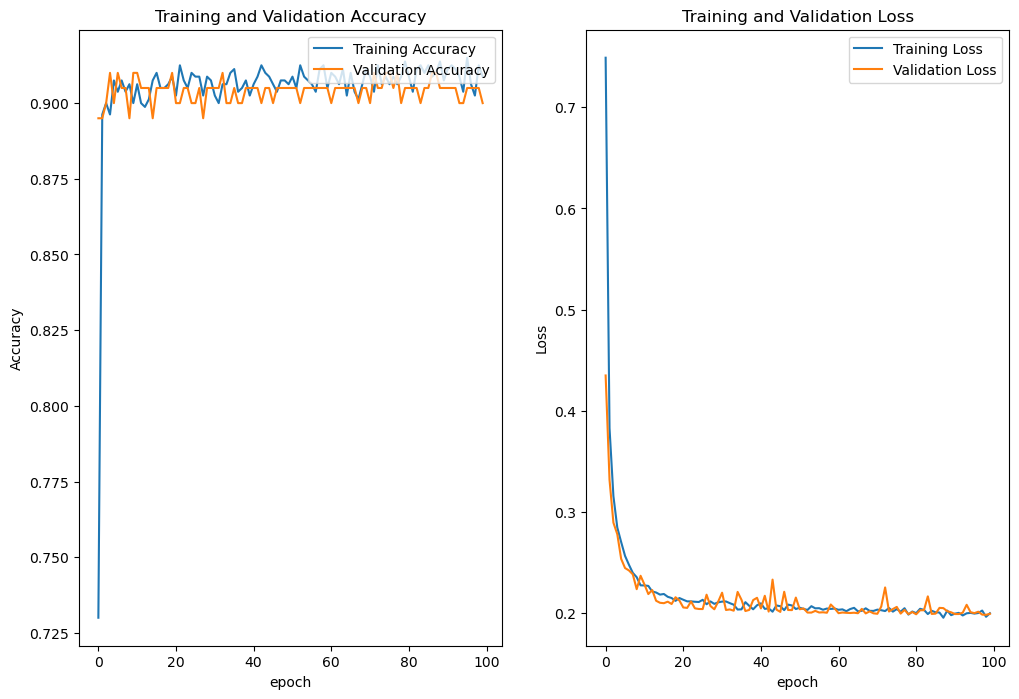

In [87]:
plot_loss_acc(history)


In [88]:
#evaluation on test data
loss,accuracy = multi_model.evaluate(X_test,y_test)
print("Loss : ",loss)
print("Accuracy : ",accuracy)


7/7 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.9000
Loss :  0.1991124153137207
Accuracy :  0.8999999761581421


In [89]:
#evaluation on train data
loss,accuracy = multi_model.evaluate(X_train,y_train)
print("Loss : ",loss)
print("Accuracy : ",accuracy)


25/25 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9112
Loss :  0.1948101967573166
Accuracy :  0.9112499952316284


In [97]:
# report 
from sklearn.metrics import classification_report

predictions = multi_model.predict(X_test)
predictions = np.argmax(predictions,axis=1)
y_test = np.argmax(y_test,axis=1)
print(classification_report(y_test,predictions))


7/7 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        44
           2       0.82      0.82      0.82        57
           3       0.76      0.76      0.76        42

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [95]:
def plot_decision_boundary_multi_class(model, X, y,title):
   
    x_span = np.linspace(min(X[:,0])-1,max(X[:,0])+1,50)
    y_span = np.linspace(min(X[:,1])-1,max(X[:,1])+1,50)
    xx,yy = np.meshgrid(x_span,y_span)
    grid = np.c_[xx.ravel(),yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.argmax(axis=1)
    z = z.reshape(xx.shape)
    plt.contourf(xx,yy,z,alpha=0.4)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.title(title)
    plt.show()  

79/79 [==============================] - 0s 1ms/step


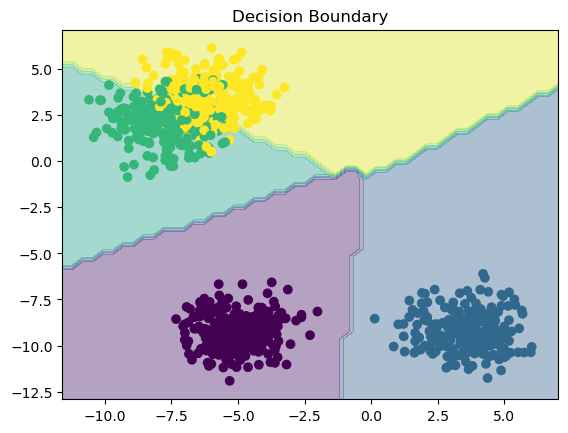

In [96]:
plot_decision_boundary_multi_class(multi_model,x,y.argmax(axis=1),"Decision Boundary")